In [6]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout , BatchNormalization ,MaxPooling2D,Activation
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import activations ,layers
from tensorflow.keras.datasets import cifar10, mnist, fashion_mnist
from tensorflow.keras.optimizers import Adam,SGD
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data

In [7]:
# (cifar10_x_train, cifar10_y_train), (cifar10_x_test, cifar10_y_test) = cifar10.load_data()
# (mnist_x_train, mnist_y_train), (mnist_x_test, mnist_y_test) = mnist.load_data()
(fashion_mnist_x_train, fashion_mnist_y_train), (fashion_mnist_x_test, fashion_mnist_y_test)= fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [8]:
fashion_mnist_x_train = fashion_mnist_x_train.reshape(fashion_mnist_x_train.shape[0],28,28,1)
fashion_mnist_x_test = fashion_mnist_x_test.reshape(fashion_mnist_x_test.shape[0],28,28,1)

In [9]:
fashion_mnist_x_train = fashion_mnist_x_train.astype("float32")/255.0
fashion_mnist_x_test = fashion_mnist_x_test.astype("float32")/255.0

pretraining

In [10]:
fashion_mnist_y_train_cat = to_categorical(fashion_mnist_y_train);
#cifar10_y_val_cat = to_categorical(cifar10_y_val);
fashion_mnist_y_test_cat=to_categorical(fashion_mnist_y_test);

In [11]:
fashion_mnist_y_train_cat[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

model_scnnb

In [12]:
model = Sequential()
model.add(Conv2D(32,(3 ,3),activation = 'linear',padding = "same" , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(Activation(activations.relu))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3 ,3),activation = 'linear',padding = "same" ))
model.add(BatchNormalization())
model.add(Activation(activations.relu))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(1280,activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation = 'softmax'))

model_scnnb_a



In [13]:
model1 = Sequential()
model1.add(Conv2D(32,(3 ,3),activation = 'linear',padding = "same" , input_shape = (28,28,1)))
model1.add(Activation(activations.relu))
model1.add(MaxPooling2D(2,2))
model1.add(Conv2D(64,(3 ,3),activation = 'linear',padding = "same" ))
model1.add(BatchNormalization())
model1.add(Activation(activations.relu))
model1.add(MaxPooling2D(2,2))
model1.add(Flatten())
model1.add(Dense(1280,activation = "relu"))
model1.add(Dropout(0.5))
model1.add(Dense(10,activation = 'softmax'))

model_scnnb_b

In [14]:
model2 = Sequential()
model2.add(Conv2D(32,(3 ,3),activation = 'linear',padding = "same" , input_shape = (28,28,1)))
model2.add(Activation(activations.relu))
model2.add(MaxPooling2D(2,2))
model2.add(Conv2D(64,(3 ,3),activation = 'linear',padding = "same" ))
model2.add(Activation(activations.relu))
model2.add(MaxPooling2D(2,2))
model2.add(Flatten())
model2.add(Dense(1280,activation = "relu"))
model2.add(Dropout(0.5))
model2.add(Dense(10,activation = 'softmax'))

In [15]:
model.compile(optimizer=SGD(0.02,momentum=0.9,weight_decay =0.000005 ), loss = 'categorical_crossentropy',metrics = ["accuracy"])

In [16]:
datagen = ImageDataGenerator(horizontal_flip = True)
history=model.fit(datagen.flow(fashion_mnist_x_train, fashion_mnist_y_train_cat,batch_size = 128),batch_size = 128,epochs =300,verbose=2,validation_data=datagen.flow(fashion_mnist_x_test,fashion_mnist_y_test_cat))

Epoch 1/300
469/469 - 15s - loss: 0.5636 - accuracy: 0.8029 - val_loss: 0.4021 - val_accuracy: 0.8563 - 15s/epoch - 32ms/step
Epoch 2/300
469/469 - 5s - loss: 0.3670 - accuracy: 0.8668 - val_loss: 0.3399 - val_accuracy: 0.8742 - 5s/epoch - 11ms/step
Epoch 3/300
469/469 - 4s - loss: 0.3113 - accuracy: 0.8860 - val_loss: 0.2831 - val_accuracy: 0.8957 - 4s/epoch - 9ms/step
Epoch 4/300
469/469 - 5s - loss: 0.2782 - accuracy: 0.8981 - val_loss: 0.2780 - val_accuracy: 0.8974 - 5s/epoch - 10ms/step
Epoch 5/300
469/469 - 5s - loss: 0.2554 - accuracy: 0.9062 - val_loss: 0.2730 - val_accuracy: 0.9010 - 5s/epoch - 11ms/step
Epoch 6/300
469/469 - 4s - loss: 0.2391 - accuracy: 0.9114 - val_loss: 0.2485 - val_accuracy: 0.9109 - 4s/epoch - 9ms/step
Epoch 7/300
469/469 - 5s - loss: 0.2258 - accuracy: 0.9178 - val_loss: 0.2483 - val_accuracy: 0.9112 - 5s/epoch - 11ms/step
Epoch 8/300
469/469 - 4s - loss: 0.2139 - accuracy: 0.9214 - val_loss: 0.2470 - val_accuracy: 0.9102 - 4s/epoch - 9ms/step
Epoch 9/3

In [33]:
model1.compile(optimizer=SGD(0.02,momentum=0.9,weight_decay =0.000005 ), loss = 'categorical_crossentropy',metrics = ["accuracy"])

In [34]:
history1=model1.fit(datagen.flow(fashion_mnist_x_train, fashion_mnist_y_train_cat,batch_size = 128),batch_size = 128,epochs =300,verbose=2,validation_data=datagen.flow(fashion_mnist_x_test,fashion_mnist_y_test_cat))


Epoch 1/300
469/469 - 6s - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.5515 - val_accuracy: 0.9314 - 6s/epoch - 13ms/step
Epoch 2/300
469/469 - 4s - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.5316 - val_accuracy: 0.9317 - 4s/epoch - 9ms/step
Epoch 3/300
469/469 - 5s - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.5455 - val_accuracy: 0.9342 - 5s/epoch - 11ms/step
Epoch 4/300
469/469 - 4s - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.5568 - val_accuracy: 0.9282 - 4s/epoch - 9ms/step
Epoch 5/300
469/469 - 4s - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.5446 - val_accuracy: 0.9294 - 4s/epoch - 9ms/step
Epoch 6/300
469/469 - 5s - loss: 0.0017 - accuracy: 0.9994 - val_loss: 0.5444 - val_accuracy: 0.9316 - 5s/epoch - 10ms/step
Epoch 7/300
469/469 - 4s - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.5695 - val_accuracy: 0.9297 - 4s/epoch - 9ms/step
Epoch 8/300
469/469 - 6s - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.5530 - val_accuracy: 0.9300 - 6s/epoch - 12ms/step
Epoch 9/300


In [19]:
model2.compile(optimizer=SGD(0.02,momentum=0.9,weight_decay =0.000005 ), loss = 'categorical_crossentropy',metrics = ["accuracy"])

In [21]:
history2=model2.fit(datagen.flow(fashion_mnist_x_train, fashion_mnist_y_train_cat,batch_size = 128),batch_size = 128,epochs =300,verbose=2,validation_data=datagen.flow(fashion_mnist_x_test,fashion_mnist_y_test_cat))


Epoch 1/300
469/469 - 7s - loss: 0.6480 - accuracy: 0.7622 - val_loss: 0.4139 - val_accuracy: 0.8557 - 7s/epoch - 14ms/step
Epoch 2/300
469/469 - 4s - loss: 0.3930 - accuracy: 0.8574 - val_loss: 0.3707 - val_accuracy: 0.8645 - 4s/epoch - 9ms/step
Epoch 3/300
469/469 - 5s - loss: 0.3420 - accuracy: 0.8759 - val_loss: 0.3211 - val_accuracy: 0.8831 - 5s/epoch - 10ms/step
Epoch 4/300
469/469 - 4s - loss: 0.3092 - accuracy: 0.8866 - val_loss: 0.3014 - val_accuracy: 0.8860 - 4s/epoch - 9ms/step
Epoch 5/300
469/469 - 4s - loss: 0.2888 - accuracy: 0.8946 - val_loss: 0.2867 - val_accuracy: 0.8937 - 4s/epoch - 9ms/step
Epoch 6/300
469/469 - 5s - loss: 0.2678 - accuracy: 0.8999 - val_loss: 0.2747 - val_accuracy: 0.9023 - 5s/epoch - 11ms/step
Epoch 7/300
469/469 - 4s - loss: 0.2558 - accuracy: 0.9057 - val_loss: 0.2588 - val_accuracy: 0.9050 - 4s/epoch - 9ms/step
Epoch 8/300
469/469 - 5s - loss: 0.2399 - accuracy: 0.9115 - val_loss: 0.2513 - val_accuracy: 0.9070 - 5s/epoch - 10ms/step
Epoch 9/300


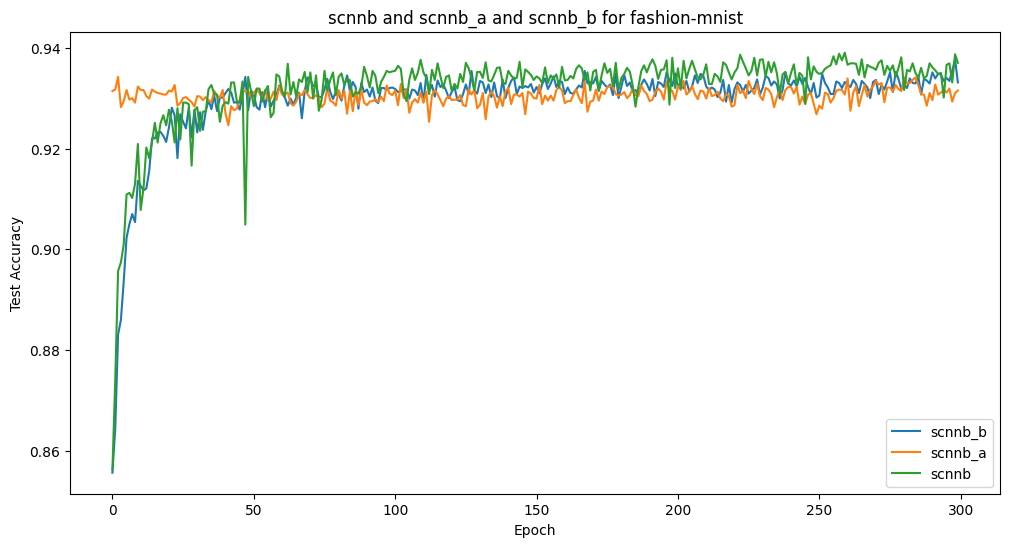

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(history2.history['val_accuracy'], label="scnnb_b")
plt.plot(history1.history['val_accuracy'], label="scnnb_a")
plt.plot(history.history['val_accuracy'], label="scnnb")
plt.legend()
plt.title("scnnb and scnnb_a and scnnb_b for fashion-mnist")
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.show()

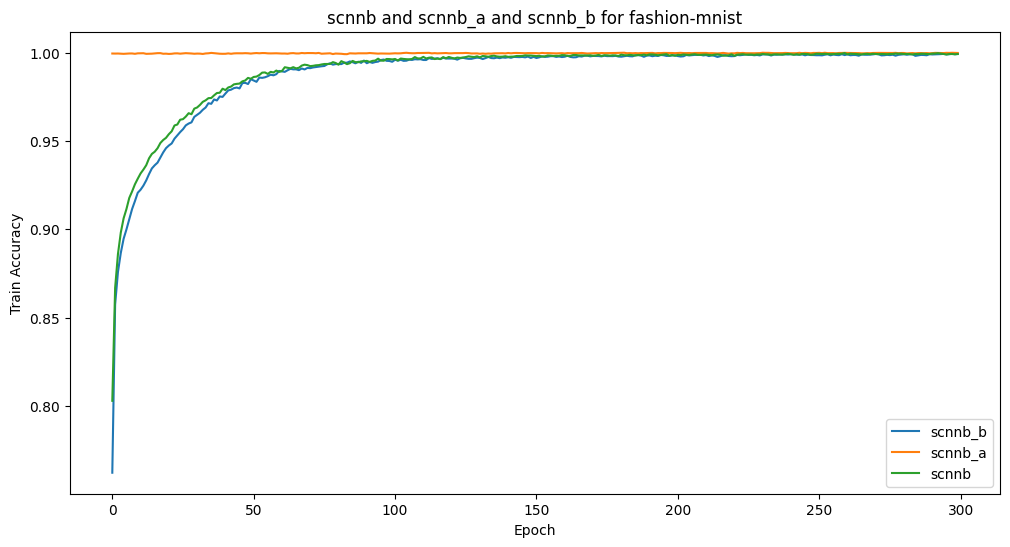

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(history2.history['accuracy'], label="scnnb_b")
plt.plot(history1.history['accuracy'], label="scnnb_a")
plt.plot(history.history['accuracy'], label="scnnb")
plt.legend()
plt.title("scnnb and scnnb_a and scnnb_b for fashion-mnist")
plt.xlabel('Epoch')
plt.ylabel('Train Accuracy')
plt.show()

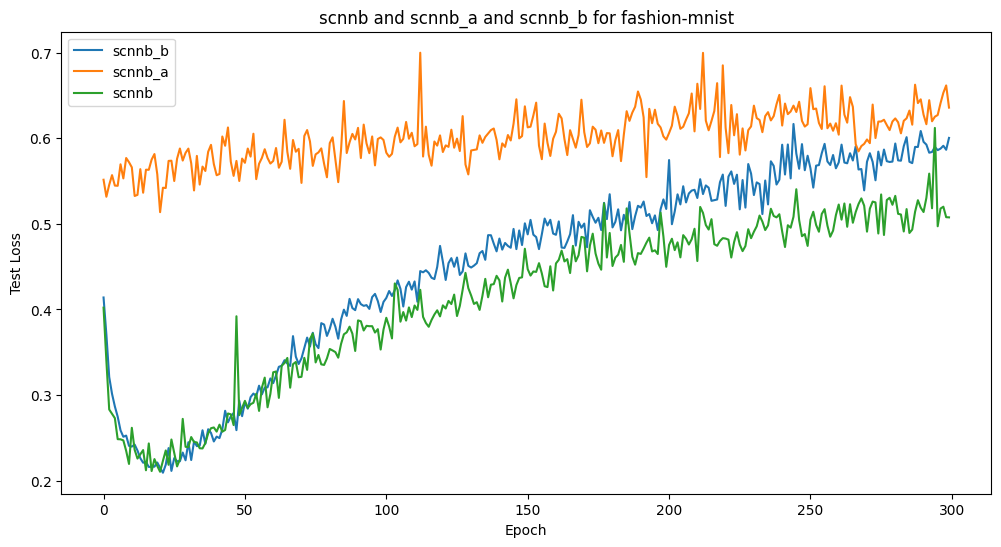

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(history2.history['val_loss'], label="scnnb_b")
plt.plot(history1.history['val_loss'], label="scnnb_a")
plt.plot(history.history['val_loss'], label="scnnb")
plt.legend()
plt.title("scnnb and scnnb_a and scnnb_b for fashion-mnist")
plt.xlabel('Epoch')
plt.ylabel('Test Loss')
plt.show()

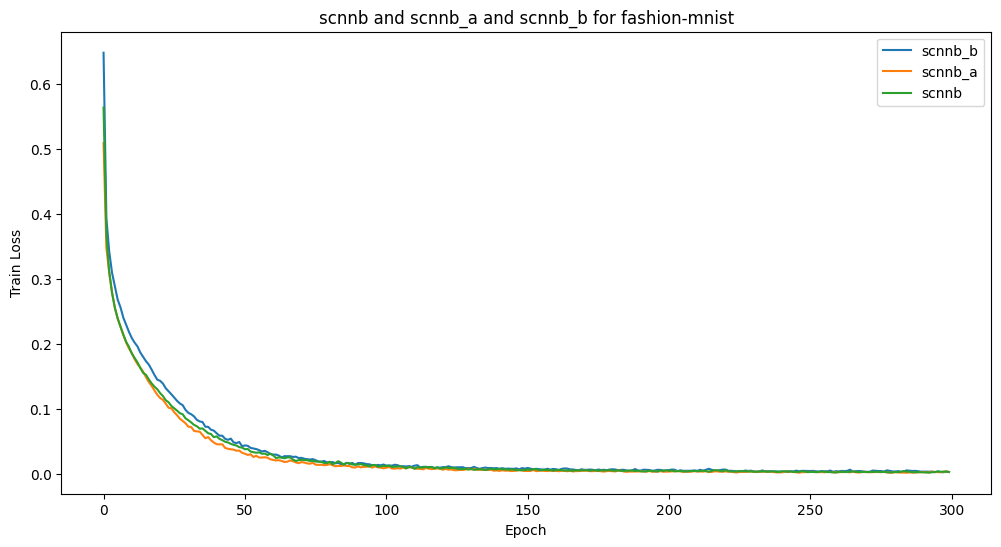

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(history2.history['loss'], label="scnnb_b")
plt.plot(history1.history['loss'], label="scnnb_a")
plt.plot(history.history['loss'], label="scnnb")
plt.legend()
plt.title("scnnb and scnnb_a and scnnb_b for fashion-mnist")
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.show()

In [27]:
model2.evaluate(datagen.flow(fashion_mnist_x_train,fashion_mnist_y_train_cat, batch_size=128) , batch_size=128)

469/469 [==============================] - 4s 9ms/step - loss: 2.0823e-05 - accuracy: 1.0000


[2.082319770124741e-05, 1.0]

In [28]:
model1.evaluate(datagen.flow(fashion_mnist_x_train,fashion_mnist_y_train_cat, batch_size=128) , batch_size=128)

469/469 [==============================] - 4s 9ms/step - loss: 3.6476e-04 - accuracy: 1.0000


[0.000364756298949942, 0.9999666810035706]

In [29]:
model.evaluate(datagen.flow(fashion_mnist_x_train,fashion_mnist_y_train_cat, batch_size=128), batch_size=128)

469/469 [==============================] - 5s 10ms/step - loss: 3.0820e-05 - accuracy: 1.0000


[3.0820465326542035e-05, 1.0]

In [30]:
model2.evaluate(datagen.flow(fashion_mnist_x_test,fashion_mnist_y_test_cat, batch_size=128) , batch_size=128)

79/79 [==============================] - 1s 10ms/step - loss: 0.5995 - accuracy: 0.9350


[0.5994806289672852, 0.9350000023841858]

In [39]:
model1.evaluate(datagen.flow(fashion_mnist_x_test,fashion_mnist_y_test_cat, batch_size=128) , batch_size=128)

79/79 [==============================] - 1s 8ms/step - loss: 0.6277 - accuracy: 0.9324


[0.6276544332504272, 0.9323999881744385]

In [32]:
model.evaluate(datagen.flow(fashion_mnist_x_test,fashion_mnist_y_test_cat, batch_size=128) , batch_size=128)

79/79 [==============================] - 1s 10ms/step - loss: 0.5078 - accuracy: 0.9369


[0.5078458786010742, 0.9369000196456909]